In [6]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

In [7]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [8]:
n = 2
grover_circuit = QuantumCircuit(n)

In [9]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [10]:
# Diffusion operator (U_s)
# Oracle U_w

N_iterations=2
for i in range(N_iterations):
    
    grover_circuit.cz(0,1) # Oracle
    grover_circuit.draw()
    
    
    grover_circuit.h([0,1])
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.h([0,1])
    
    


grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘   └───┘└───┘   └───┘

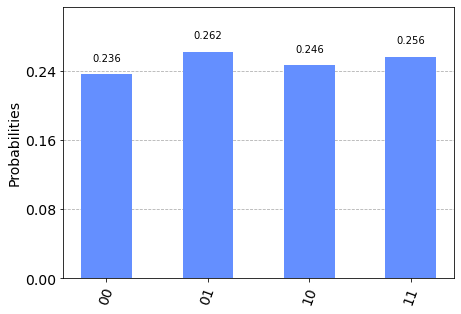

In [11]:
grover_circuit.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [12]:
def grover_iteration_U2(grover_circuit):
        grover_circuit.cz(0,1) # Oracle
        grover_circuit.draw()

        #(U_s)
        grover_circuit.h([0,1]) 
        grover_circuit.z([0,1])
        grover_circuit.cz(0,1)
        grover_circuit.h([0,1])


def Complete_circuit(n=2, N_iter=1):
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1])
    #grover_circuit.draw()
    N_iterations=N_iter
    for i in range(N_iterations):
        
        grover_iteration_U2(grover_circuit)
        
    
    return grover_circuit


In [13]:
grover_circuit=Complete_circuit(n=2, N_iter=1)

In [14]:
from qiskit.quantum_info import state_fidelity

backend = Aer.get_backend('statevector_simulator')
job = execute(grover_circuit, backend)
qc_state = job.result().get_statevector(grover_circuit)


target_vector = np.array([0.0, 0.0, 0.0, 1.0])


state_fidelity(target_vector,qc_state)

1.0

In [15]:
qc_state
from qiskit_textbook.tools import vector2latex
vector2latex(qc_state, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [16]:
N_it_max=10

In [17]:


backend = Aer.get_backend('statevector_simulator')

target_vector = np.array([0.0, 0.0, 0.0, 1.0])

fidelity=[]

state_vecs=[]

for i in range(1, N_it_max):
    grover_circuit=Complete_circuit(n=2, N_iter=i)
    job = execute(grover_circuit, backend)
    qc_state = job.result().get_statevector(grover_circuit)

    #state_fidelity(target_vector,qc_state)
    state_vecs.append(qc_state)
    
    fidelity.append( state_fidelity(target_vector,qc_state) )
    


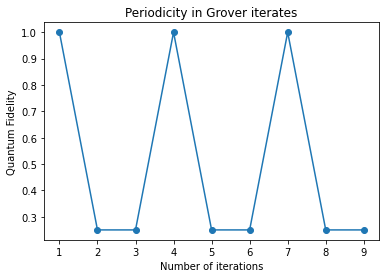

In [18]:
import matplotlib.pyplot as plt
x=range(1,N_it_max)

plt.plot(x, fidelity)

plt.xlabel("Number of iterations")

plt.ylabel("Quantum Fidelity")

plt.title("Periodicity in Grover iterates")

plt.scatter(x, fidelity)
plt.savefig("per_gro_it")


In [19]:
# from qiskit.visualization import plot_bloch_vector
# from qiskit.visualization import plot_bloch_multivector

# %matplotlib inline

# plot_bloch_multivector(qc_state, title="New Bloch Multivector")

# plot_bloch_multivector(state_vecs[0], title="New Bloch Multivector")

# Periodicity in Grover Search

In [20]:
def grover_iteration_U2(grover_circuit):
        grover_circuit.cz(0,1) # Oracle
        grover_circuit.draw()

        #(U_s)
        grover_circuit.h([0,1]) 
        grover_circuit.z([0,1])
        grover_circuit.cz(0,1)
        grover_circuit.h([0,1])

def Complete_circuit(n=2, N_iter=1):
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1])
    #grover_circuit.draw()
    N_iterations=N_iter
    for i in range(N_iterations):
        
        grover_iteration_U2(grover_circuit)
        
    
    return grover_circuit


In [21]:
grover_circuit=Complete_circuit(n=2, N_iter=1)

In [22]:
N_it_max=20

In [23]:
# from qiskit.quantum_info import state_fidelity
backend = Aer.get_backend('statevector_simulator')

target_vector = np.array([0.0, 0.0, 0.0, 1.0])

fidelity=[]

state_vecs=[]

for i in range(1, N_it_max):
    grover_circuit=Complete_circuit(n=2, N_iter=i)
    job = execute(grover_circuit, backend)
    qc_state = job.result().get_statevector(grover_circuit)

    #state_fidelity(target_vector,qc_state)
    state_vecs.append(qc_state)
    
    fidelity.append( state_fidelity(target_vector,qc_state) )
    


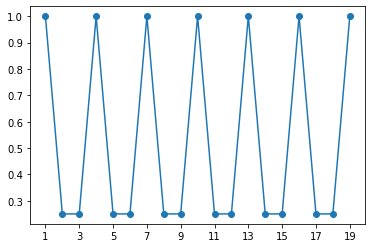

In [24]:
import matplotlib.pyplot as plt
x=range(1,N_it_max)

plt.plot(x, fidelity)
plt.xticks(range(1,N_it_max,2))

plt.scatter(x, fidelity)

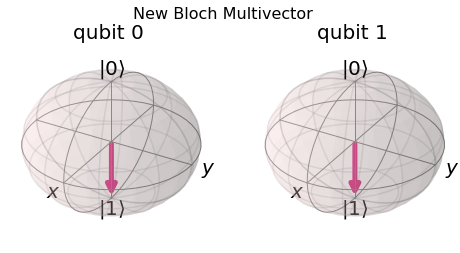

In [25]:
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector

%matplotlib inline

plot_bloch_multivector(qc_state, title="New Bloch Multivector")

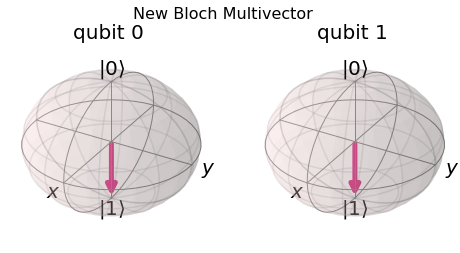

In [26]:
plot_bloch_multivector(state_vecs[0], title="New Bloch Multivector")

# Fixed point Search

In [27]:
from qiskit.quantum_info.operators import Operator, Pauli


In [28]:
theta=np.pi/3

#Ora = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, np.exp(1j*np.pi/3)]])
Ora = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, np.exp(1j*theta)]])

Rs = Operator([[np.exp(1j*theta), 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

#Rs= Operator([[1, 0, 0, 0], [0, np.exp(1j*theta), 0, 0], [0, 0, np.exp(1j*theta), 0], [0, 0, 0, np.exp(1j*theta)]])

#Method 1: Directly applying the written oracle

In [29]:
def grover_iteration_U2(grover_circuit,op=None):
        
        
        if op==None:
            #grover_circuit.cz(0,1) # Oracle
            grover_circuit.append(Ora,[0,1])


            #grover_circuit.draw()

            #(U_s)
            grover_circuit.h([0,1]) 

            grover_circuit.append(Rs,[0,1])
            grover_circuit.h([0,1])
        
        return grover_circuit
            
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc            
            
def fixed_point_grover(N_iter):


    if N_iter==1:

        grover_circuit = QuantumCircuit(n)
        grover_circuit = initialize_s(grover_circuit, [0,1])

        #print( grover_circuit.draw() )

        ## 1st iteration    
        #grover_circuit.cz(0,1) # Oracle
        grover_circuit.append(Ora,[0,1])
        grover_circuit.draw()
        
        #(U_s)
        grover_circuit.h([0,1]) 
        grover_circuit.append(Rs,[0,1])
        grover_circuit.h([0,1])
    
        return grover_circuit
    
    else:
         
        grover_circuit = QuantumCircuit(n)
        #grover_circuit = initialize_s(grover_circuit, [0,1])
        
        
 
        #grover_circuit=fixed_point_grover(N_iter-1)
        #print(fixed_point_grover(N_iter-1).draw())
        
        op=Operator(fixed_point_grover(N_iter-1))
        
        #print(grover_circuit.draw())
        adop=op.adjoint()
        
        
        grover_circuit.append(op,[0,1])
        #print(grover_circuit.draw())
        
        grover_circuit.append(Ora,[0,1])
        #grover_circuit.draw()
        grover_circuit.append(adop,[0,1])

        #(U_s)
        #grover_circuit.h([0,1]) 

        grover_circuit.append(Rs,[0,1])
        #grover_circuit.h([0,1])
        
        grover_circuit.append(op,[0,1])
        
        
        return grover_circuit
    
    
# op=Operator(grover_circuit)
# for i in range(N_iter-1):

                
def Complete_circuit(n=2, N_iter=1):
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1])
    #print( grover_circuit.draw() )
    N_iterations=N_iter
    for i in range(N_iterations):        
        grover_iteration_U2(grover_circuit)
    return grover_circuit


In [30]:

# fixedgrover=fixed_point_grover(2)
# fixedgrover.draw()

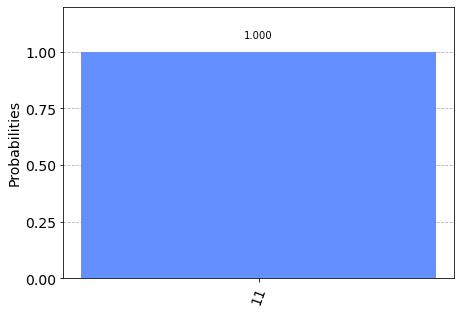

In [31]:

N_it_max=10

fixedgrover=fixed_point_grover(N_it_max)

fixedgrover.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024

results = execute(fixedgrover, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [32]:
from qiskit.quantum_info import state_fidelity

backend = Aer.get_backend('statevector_simulator')

target_vector = np.array([0.0, 0.0, 0.0, 1.0])

fidelity=[]

state_vecs=[]

for i in range(1, N_it_max):
    #grover_circuit=Complete_circuit(n=2, N_iter=i)
    #job = execute(grover_circuit, backend)
    fixedgrover=fixed_point_grover(i)
    job = execute(fixedgrover, backend)
    qc_state = job.result().get_statevector(fixedgrover)

    #state_fidelity(target_vector,qc_state)
    state_vecs.append(qc_state)
    
    fidelity.append( state_fidelity(target_vector,qc_state) )

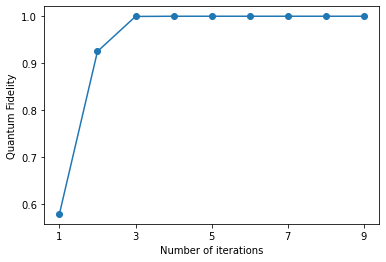

In [33]:
import matplotlib.pyplot as plt


x=range(1,N_it_max)
plt.xticks(range(1,N_it_max,2))

plt.ylabel("Quantum Fidelity")
plt.xlabel("Number of iterations")
plt.plot(x, fidelity)
plt.scatter(x, fidelity)

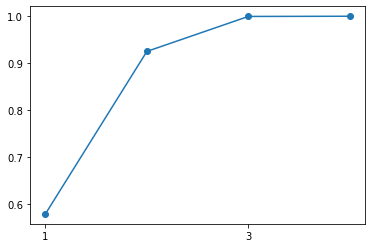

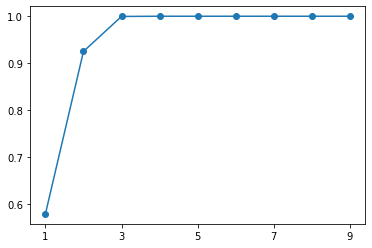

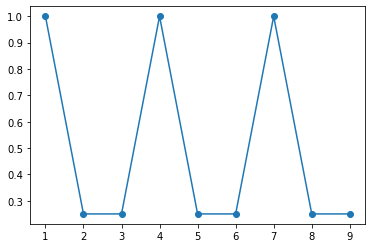
[1.0,
 0.25000000000000033,
 0.2499999999999994,
 0.9999999999999996,
 0.25000000000000067,
 0.24999999999999895,
 0.9999999999999996,
 0.2500000000000011,
 0.2499999999999986]